In [1]:
import numpy as np
import pandas as pd 
df = pd.read_csv("carprices.csv")

In [3]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [5]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [6]:
final = merged.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


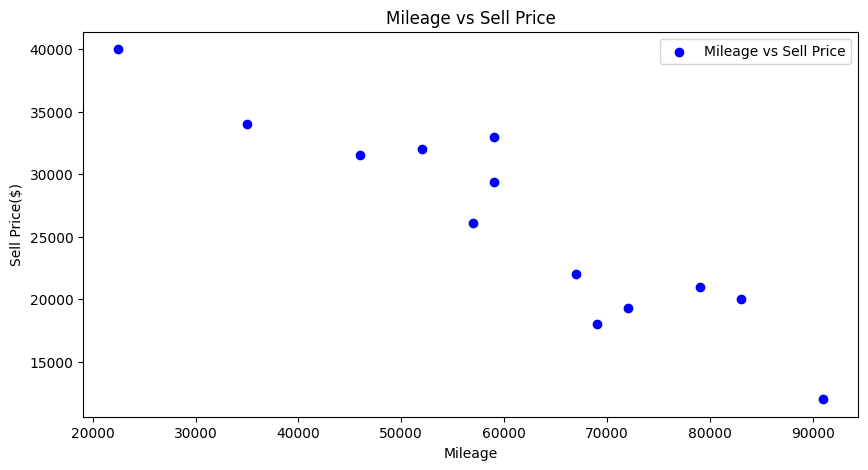

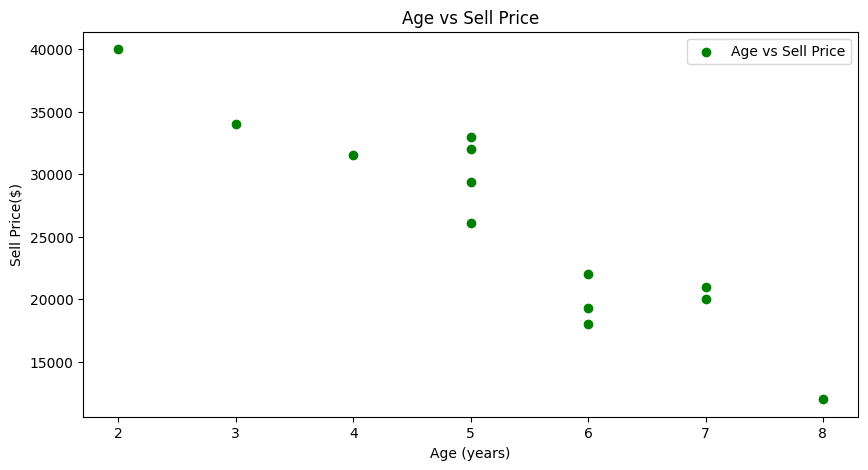

In [8]:
import matplotlib.pyplot as plt

# Scatter plot for Mileage vs Sell Price
plt.figure(figsize=(10, 5))
plt.scatter(final['Mileage'], final['Sell Price($)'], color='blue', label='Mileage vs Sell Price')
plt.title('Mileage vs Sell Price')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.legend()
plt.show()

# Scatter plot for Age vs Sell Price
plt.figure(figsize=(10, 5))
plt.scatter(final['Age(yrs)'], final['Sell Price($)'], color='green', label='Age vs Sell Price')
plt.title('Age vs Sell Price')
plt.xlabel('Age (years)')
plt.ylabel('Sell Price($)')
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = final[['Mileage', 'Age(yrs)', 'Audi A5', 'BMW X5']]
y = final['Sell Price($)']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict the price of a Mercedes Benz, 4 years old, with 45,000 miles
mercedes_price = model.predict([[45000, 4, 0, 0]])
print(f"Predicted price of a Mercedes Benz (4 years old, 45,000 miles): ${mercedes_price[0]:.2f}")

# Predict the price of a BMW X5, 7 years old, with 86,000 miles
bmw_price = model.predict([[86000, 7, 0, 1]])
print(f"Predicted price of a BMW X5 (7 years old, 86,000 miles): ${bmw_price[0]:.2f}")

# Calculate the score (accuracy) of the model
score = model.score(X, y)
print(f"Model accuracy (R^2 score): {score:.2f}")

Predicted price of a Mercedes Benz (4 years old, 45,000 miles): $36991.32
Predicted price of a BMW X5 (7 years old, 86,000 miles): $11080.74
Model accuracy (R^2 score): 0.94


C:\Users\USERAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\USERAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
